# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) PCA Lab II: Airports
Week 7 | Lab 2.4

## Introduction

> ***Note:*** _This should be a solo exercise (though as always do discuss!)_.

You've conducted principal component analysis on numerous datasets by this point and you're well on your way to adding more complex methods to your toolbox. We're going to look back at the airport delays data from the last lab and dive a little deeper - conducting a k-means clustering, after finding the principal components of the data.

Here's the case: 

You're working for the FAA and want to understand the nature of flight delays. Looking at the [operations data](./assets/datasets/airport_operations.csv) for various airports, you want to understand what components are most important for each airport so that the FAA can target and assess poor performing airports. Your task is to first conduct a PCA on this data and second perform a k-means clustering analysis to understand the principal components - the clusters - and how they interact!

## Exercise

#### Requirements

- Import the data
- Perform a Principal Component Analysis to determine which components are most significant in relation to flight delays.
- Graph your PCA results to better understand the distribution of the principal components
- Perform k-means clustering on and graph it against the principal components
- Create a write-up of your findings; for the technical team members make sure to comment your process, and for the non-technical team members, draft a brief report to outline why your findings are significant.

Just as in a real life scenario, the data and your analysis will not always be clear cut. While you may be wondering when you've succeeded in solving the problem, we're looking for your best recommendations based on the available data. Work through the process until you and your teammate have enough information to provide an in-depth analysis.

**Bonus:**
- Repeat your analysis on subsets of the data to understand deeper insights into the behavior of flight delays. For instance, instead of looking at all of the data, subset your analysis to look at just delay or arrival metrics. 

#### Deliverable

Your finished product will be a Jupyter Notebook containing your analysis, which will include;

- Your solution code
- A brief write-up on your finds related to airport delays 
- Recommendations for analytical procedures for the datasets

If you don't finish in time, that's ok! Complete the assignment as additional practice outside of class. Remember, this lab is a valuable opportunity to refine the skills you'll need to tackle your project!

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import metrics

%matplotlib inline

## Step 1: Setup the Data

In [3]:
# airport_operations dataset located at  assets/datasets/airport_operations.csv

In [5]:
airports = pd.read_csv('/Users/generalassembly/Git_Folder/DSI_LDN_1_LESSON_NOTES/week7/day2/assets/datasets/airport_operations.csv')
airports.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data.

## Step 3: Define the Variables

Next, let's define the x and y variables: Airport is going to be our "x" variable

In [6]:
x = airports.ix[:,2:14].values
y = airports.ix[:,0].values

## Step 4: Covariance Matrix

Then, standardize the x variable for analysis

In [7]:
xStand = StandardScaler().fit_transform(x)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [8]:
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

# Step 5: Eigenpairs

Then, check your eigenvalues and eigenvectors:

In [9]:
print(eigenValues)
print(eigenVectors)

[  5.71594128e+00   4.10771763e+00   8.46070622e-01   4.92674626e-01
   4.68096266e-01   1.66713004e-01   8.78260266e-02   7.27989129e-02
   5.25813963e-02   2.99299918e-03   1.67049793e-04   7.05899593e-04]
[[ -1.92844661e-01  -3.85272521e-01  -4.00175037e-01  -1.64039585e-01
    1.86296653e-01   2.78156147e-01   7.86539360e-02   3.17041164e-02
    7.52767812e-02  -1.14438376e-02  -7.07864735e-01  -3.44682322e-02]
 [ -1.92353674e-01  -3.85057896e-01  -4.02190449e-01  -1.66802678e-01
    1.84403875e-01   2.78351867e-01   9.04981279e-02   3.77083630e-02
    8.09001581e-02   1.35190021e-02   7.04235896e-01   3.71215770e-02]
 [  2.87689649e-01  -3.33455724e-01   2.51323774e-01   8.13357968e-02
    7.50865080e-03   2.37735910e-02  -5.78177983e-02   1.41563250e-02
    4.95309257e-01  -6.57324120e-01   2.23495764e-02  -2.32792117e-01]
 [  3.80590914e-01  -1.72431188e-01   8.79462334e-02   7.06458258e-02
    2.02464908e-01   3.45123821e-03  -3.15914078e-01   9.30547916e-02
    4.84973886e-01 

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [10]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.71594128131
4.10771763057
0.846070621527
0.492674626426
0.468096266456
0.166713003709
0.0878260265801
0.0727989128724
0.0525813962709
0.0029929991831
0.000705899593354
0.000167049792638


## Step 6: Explained Variance

In [11]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]
print(varExpl)

[47.576205670808939, 34.190277543366449, 7.0422049354191847, 4.1007400534903526, 3.896163930074712, 1.3876230986505973, 0.73101330090439509, 0.60593625458598122, 0.43765728168431456, 0.024912002713085375, 0.0058755019660889024, 0.0013904263358732137]


In [12]:
cvarex = np.cumsum(varExpl)
print(cvarex)

[ 47.57620567  81.76648321  88.80868815  92.9094282   96.80559213
  98.19321523  98.92422853  99.53016479  99.96782207  99.99273407
  99.99860957 100.        ]


Now, calculate the explained variance and the Cumulative explained variance

** What does the explained variance tell us?**: Here, we can see that 81.77% of the behavior can be explained by the first two principal components

## Step 7: Perform the PCA

Instead of creating the projection matrix, we're going to use Scikit's built in function. Now that we have discovered the principal componants, we have an educated idea on how many componants to pass to the function. 

In [73]:
pcask = PCA(n_components=2)
Y = pcask.fit_transform(xStand)

Create a dataframe from the PCA results

In [74]:
Ydf = pd.DataFrame(Y, columns=["PC1", "PC2"])

Now, create a new dataframe that uses the airport and year from the original set and join the PCA results with it to form a new set

In [15]:
airports2 = airports[['airport', 'year']]
airport_pca = airports2.join(Ydf, on=None, how='left')
Ydf.head()

,PC1,PC2
0,-2.086696,0.426938
1,-2.440534,0.294452
2,-2.033885,0.630585
3,-1.604414,0.419835
4,-2.086842,0.376771


Next, graph the results onto the new feature space

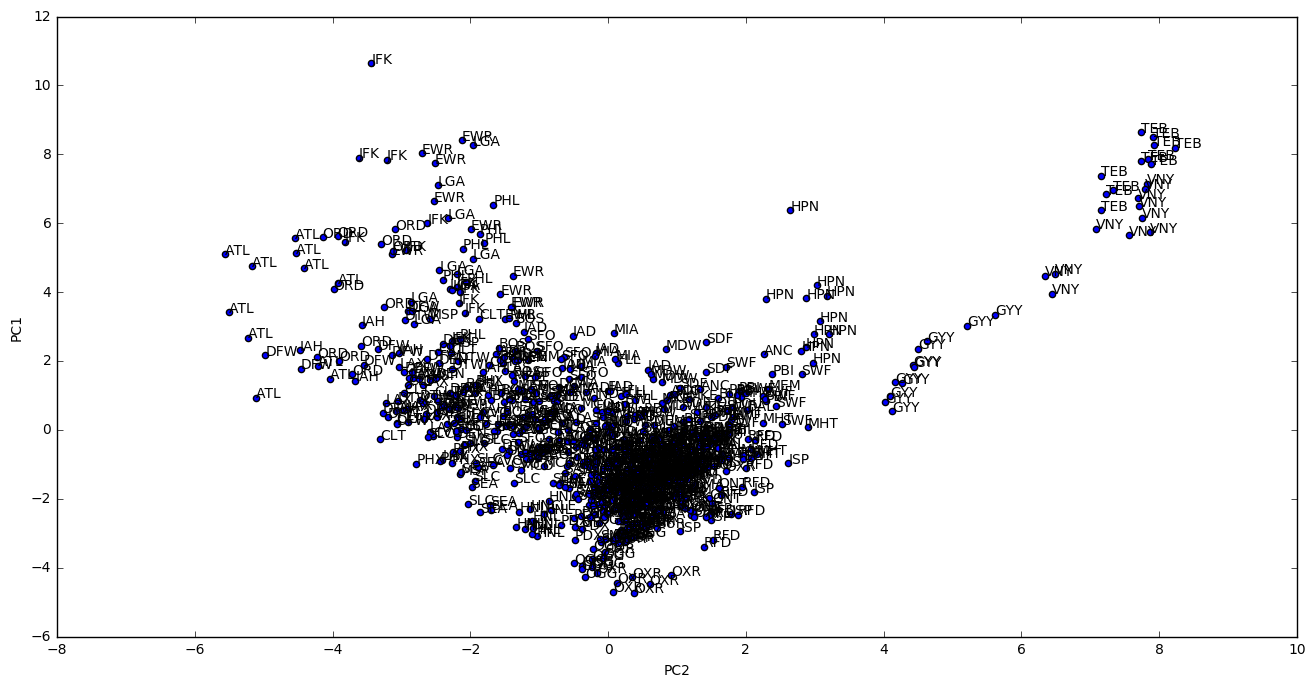

In [16]:
graph = airport_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))

**What does the graph tell us?**

## Step 8: Cluster with K-Means

Set up the k-means clustering analysis. Use the graph from above to derive "k"

In [17]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(x)

Compute the labels and centroids

In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)

[[  5.67404133e+04   5.65695283e+04   7.59414000e-01   7.28606333e-01
    7.48287333e-01   1.36144000e+01   1.19729833e+01   2.52395000e+00
    1.53959000e+01   2.60661667e+00   9.44200000e-01   3.11603333e+00]
 [  2.36514282e+05   2.35399046e+05   7.75831950e-01   6.78621577e-01
    7.69203734e-01   1.34294606e+01   1.80114523e+01   5.99892116e+00
    1.83762656e+01   3.70452282e+00   2.35643154e+00   3.86539419e+00]]


Compute the Silhoutte Score

In [20]:
metrics.silhouette_score(x, labels, metric='euclidean')

0.67002249577326389

Lastly, plot the new two-dimensional data along with their cluster assignments: 

In [21]:
airport_pca['cluster'] = pd.Series(clusters.labels_)

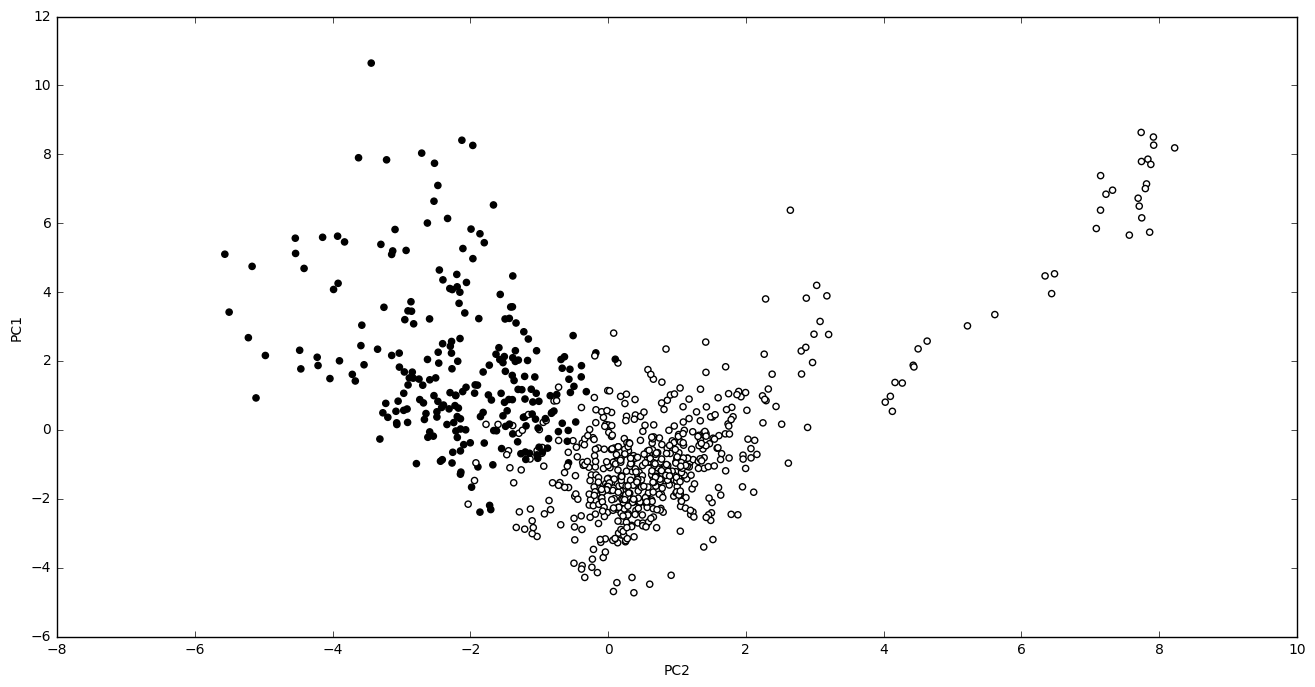

In [22]:
graph2 =airport_pca.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=airport_pca.cluster.astype(np.float), 
    figsize=(16,8))

for i, airport in enumerate(airports['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))